# Getting Insights on our Dataset

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import time
import os
import collections
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [86]:
os.chdir("C:/Users/vjred/Google Drive (vizo.datascience@gmail.com)/Kaggle/Credit Card Fraud Detection")

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [87]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [88]:
# Null Value Check!
df.isnull().sum()
df.isnull().sum().max()

0

In [89]:
# The classes are imbalanced.
print('Percent of No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Percent of Frauds   ', round(df['Class'].value_counts()[1]/len(df) * 100,2), ' % of the dataset')

Percent of No Frauds 99.83 % of the dataset
Percent of Frauds    0.17  % of the dataset


#### Note: Imbalanced dataset! Most of the transactions are non-fraud. If we use this dataframe our algorithms will probably overfit since it will "assume" that most transactions are not fraud.

Text(0, 0.5, 'Frequency')

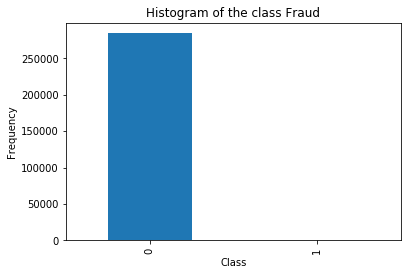

In [90]:
#Check the dependent variable classes.
count_classes = df['Class'].value_counts(sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histogram of the class Fraud")
plt.xlabel("Class")
plt.ylabel("Frequency")

#### Using Robust Scalar to scale the two variables, Amount and time

In [91]:
# Since 28 columns are scaled we should scale the columns that are remaining, Amount and Time.
from sklearn.preprocessing import RobustScaler

# RobustScaler: Less prone to outliers as compared to StandardScalar.
scaler = RobustScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [92]:
# Moving Columns
sa = df['scaled_amount']
st = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', sa)
df.insert(1, 'scaled_time', st)

df.head()  

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [93]:
#2. Separating Y
X = df.iloc[:, 0:30]
y = df.loc[:, df.columns == 'Class']

# Random Under-Sampling:

#### In this section we will implement "Random Under Sampling" which consists of removing data in order to have a more balanced dataset and thus avoiding overfitting of the model.

In [94]:
#3. Resampling.
# Number of minority class points .
total_records_fraud = len(df[df.Class == 1])
FraudIndices = np.array(df[df.Class == 1].index)

# Picking indices of the regular class
NormalIndices = np.array(df[df.Class == 0].index)

# Out of the indices we picked, randomly select "x" number (total_records_fraud)
normal_random_indices = np.random.choice(NormalIndices, total_records_fraud, replace = False)
normal_random_indices = np.array(normal_random_indices)

# Appending the two indices
indices_us = np.concatenate([FraudIndices,normal_random_indices])

# Under Sample dataset
new_df = df.iloc[indices_us,:]
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-0.307413,-0.990214,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,7.084469,-0.989438,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,3.045204,-0.942563,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,0.517013,-0.912910,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,-0.293440,-0.906648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1


# Equal Distribution

#### Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.


In [95]:
# Separating Y
X_us = new_df.iloc[:, 0:30]
y_us = new_df.loc[:, new_df.columns == 'Class']

# Showing ratio
print("Total number of transactions in new df: ", len(new_df))
print("Percentage of normal transactions     : ", int(round(len(new_df[new_df.Class == 0])/len(new_df) * 100,2)), "%")
print("Percentage of fraud transactions      : ", int(round(len(new_df[new_df.Class == 1])/len(new_df) * 100,2)), "%")

Total number of transactions in new df:  984
Percentage of normal transactions     :  50 %
Percentage of fraud transactions      :  50 %


#### Looking at distributions of all our variables

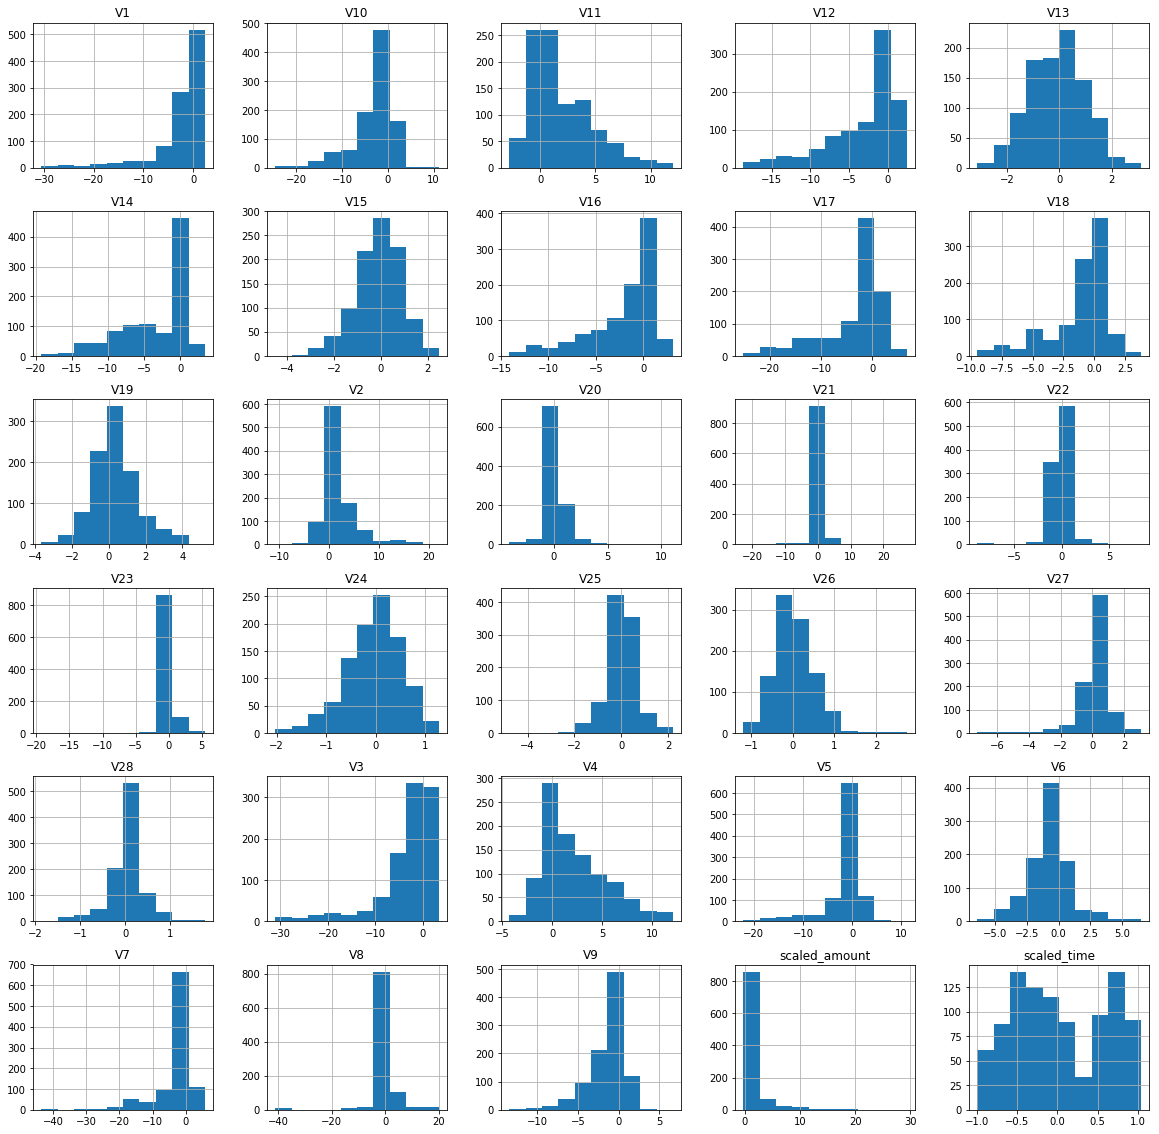

In [96]:
X_us.hist(figsize=(20,20))
plt.show()

### Correlation Plot to see the correlation between the variables

#### Correlation matrices are at the core of understanding our data. We want to know if there are features that influence heavily on a specific transaction being fraud. 

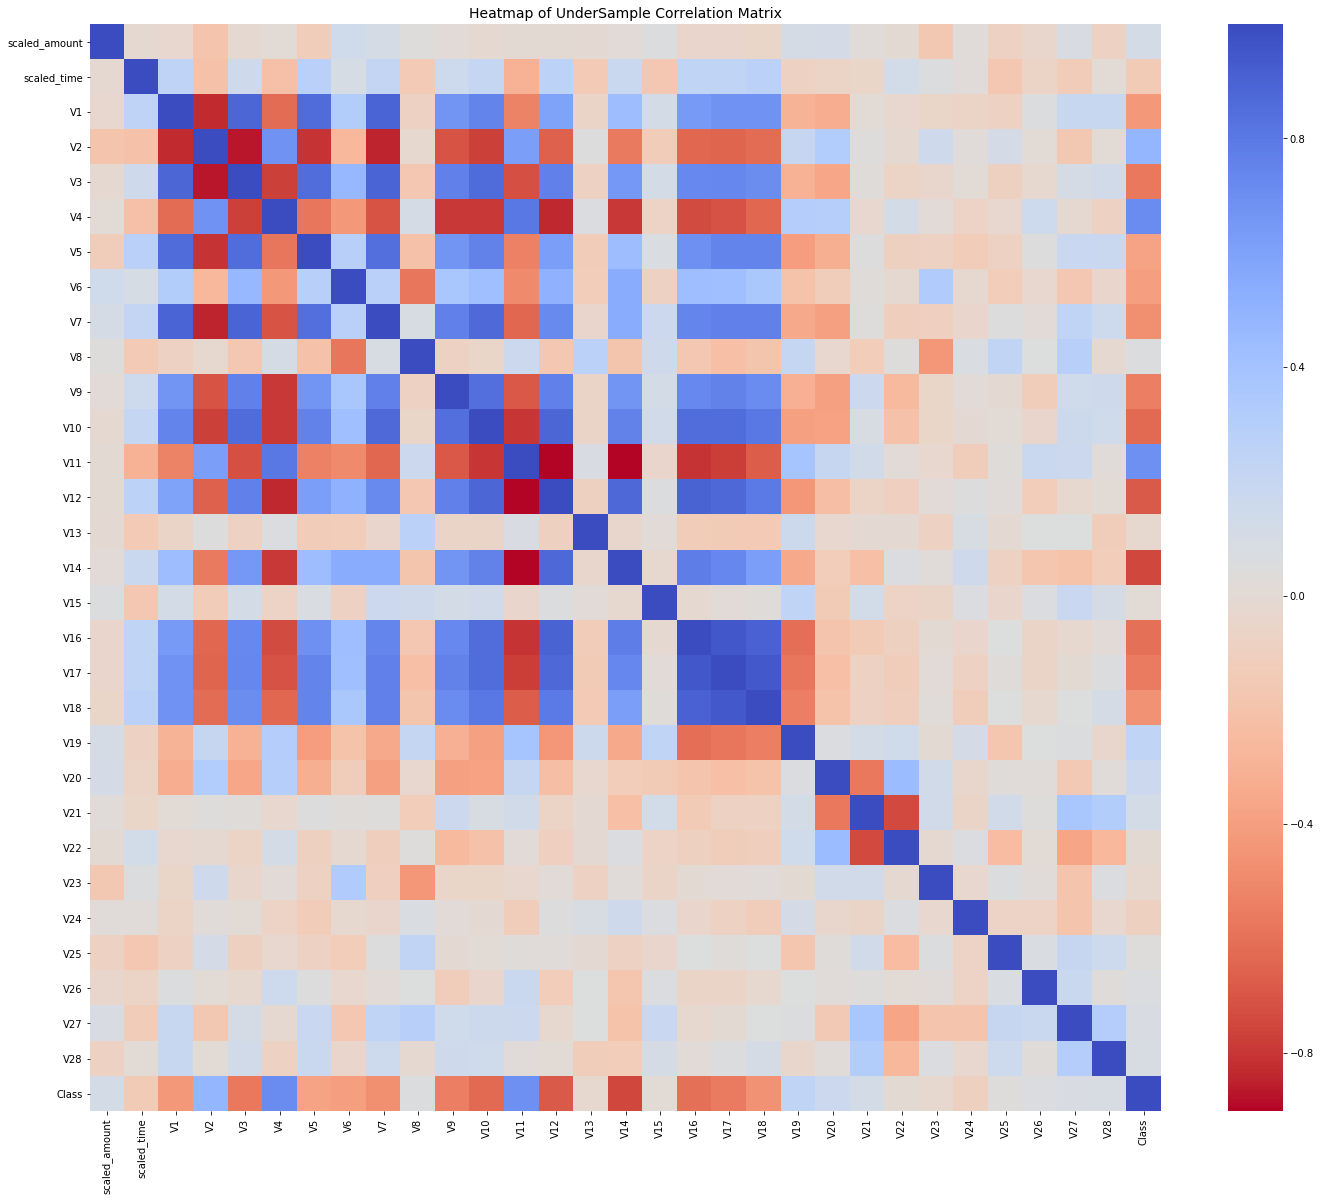

In [97]:
# Use UnderSample in our correlation
f, ax = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':15}, ax=ax)
ax.set_title('Heatmap of UnderSample Correlation Matrix', fontsize=14)
plt.show()

#### Use of boxplots to have a better understanding of the distribution of these features in fradulent vs non fradulent transactions

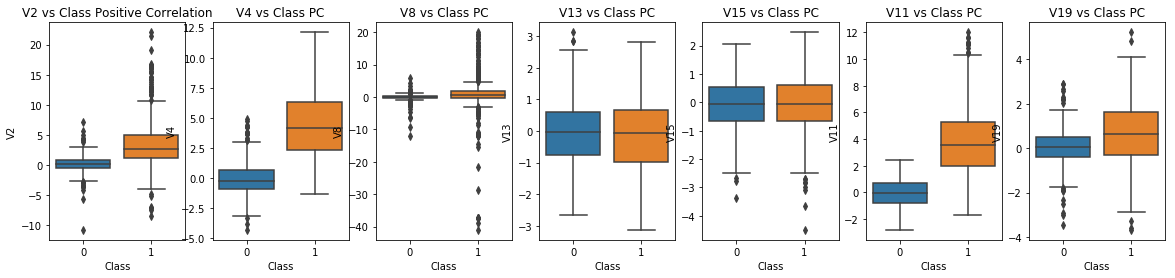

In [98]:
f, axes = plt.subplots(ncols=7, figsize=(20,4))
    
# Positive Correlation: The higher our feature value the more likely it will be a fraud transaction
sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class PC')
    
sns.boxplot(x="Class", y="V8", data=new_df, ax=axes[2])
axes[2].set_title('V8 vs Class PC')
    
sns.boxplot(x="Class", y="V13", data=new_df, ax=axes[3])
axes[3].set_title('V13 vs Class PC')
    
sns.boxplot(x="Class", y="V15", data=new_df, ax=axes[4])
axes[4].set_title('V15 vs Class PC')
    
    
sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[5])
axes[5].set_title('V11 vs Class PC')
    
sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[6])
axes[6].set_title('V19 vs Class PC')
    
plt.show()

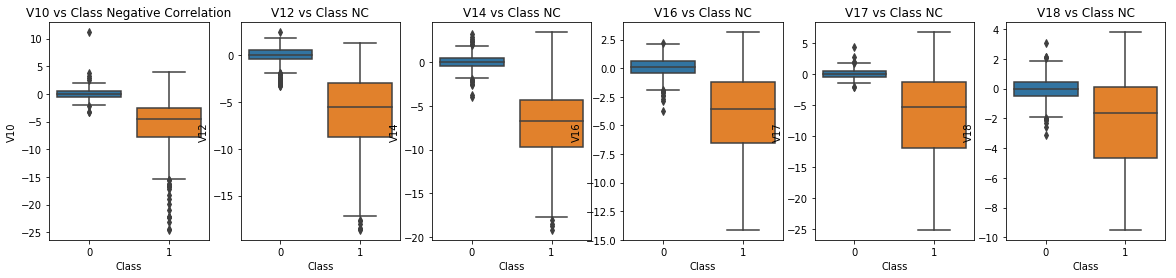

In [99]:
f, axes = plt.subplots(ncols=6, figsize=(20,4))

# Negative Correlation:The lower our feature value the more likely it will be a fraud transaction
sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[1])
axes[1].set_title('V12 vs Class NC')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[2])
axes[2].set_title('V14 vs Class NC')

sns.boxplot(x="Class", y="V16", data=new_df, ax=axes[3])
axes[3].set_title('V16 vs Class NC')

sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[4])
axes[4].set_title('V17 vs Class NC')

sns.boxplot(x="Class", y="V18", data=new_df, ax=axes[5])
axes[5].set_title('V18 vs Class NC')

plt.show()

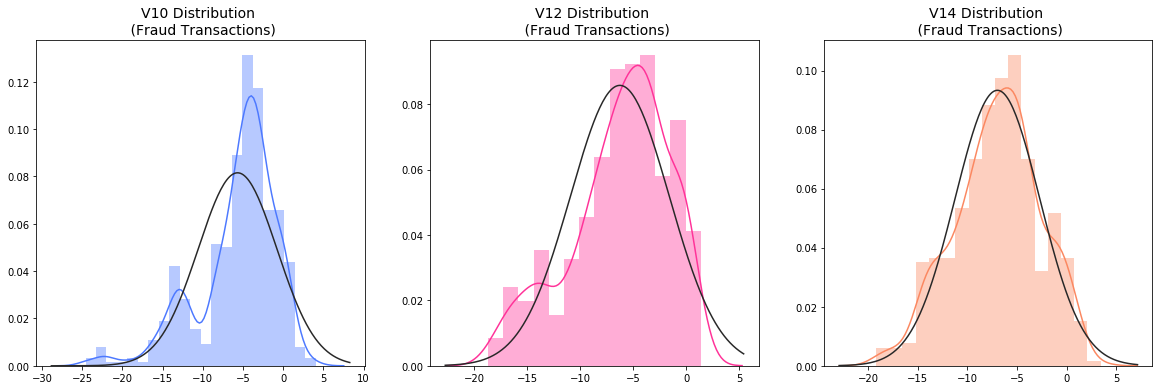

In [100]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

fraud_dist_v10 = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(fraud_dist_v10,ax=ax1, fit=norm, color='#4d79ff')
ax1.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

fraud_dist_v12 = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(fraud_dist_v12,ax=ax2, fit=norm, color='#ff3399')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

fraud_dist_v14 = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(fraud_dist_v14,ax=ax3, fit=norm, color='#FB8861')
ax3.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

### Clustering and Dimentionality reduction using t-SNE, PCA and TruncatedSVD

#### t-SNE algorithm is able to detect clusters pretty accurately in every scenario. This gives us a signal that predictive models will perform well in separating fraud cases from non-fraud cases. 

In [101]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

# T-SNE Implementation
X_us_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_us.values)

# PCA Implementation
X_us_pca = PCA(n_components=2, random_state=42).fit_transform(X_us.values)

# TruncatedSVD
X_us_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_us.values)


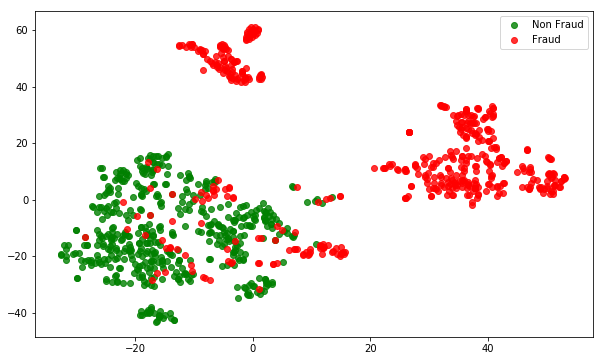

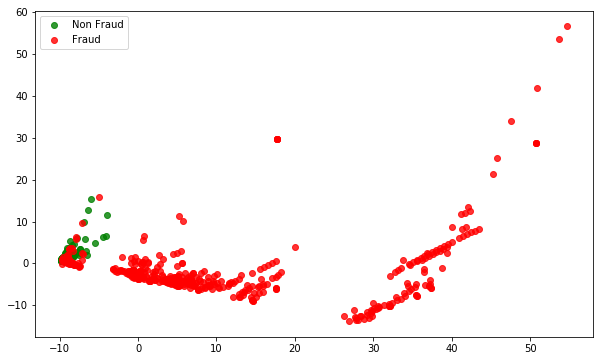

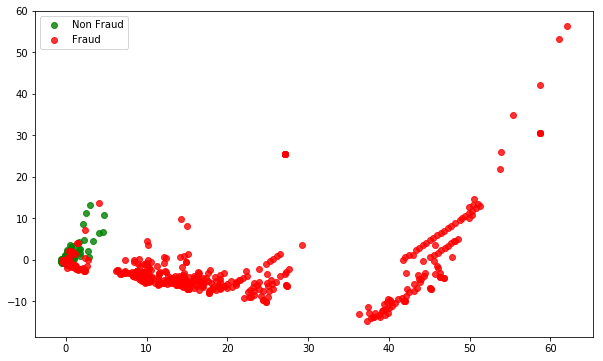

In [102]:
def tsne_plot(x, y, name="plot.png"):
    tsne = TSNE(n_components=2, random_state=0).fit_transform(x)

    plt.figure(figsize=(10, 6))
    plt.scatter(tsne[np.where(y == 0), 0], tsne[np.where(y == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(tsne[np.where(y == 1), 0], tsne[np.where(y == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X_us, y_us, "tsne.png")

def pca_plot(x, y, name="plot.png"):
    pca = PCA(n_components=2, random_state=42).fit_transform(X_us.values)

    plt.figure(figsize=(10, 6))
    plt.scatter(pca[np.where(y == 0), 0], pca[np.where(y == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(pca[np.where(y == 1), 0], pca[np.where(y == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
pca_plot(X_us, y_us, "pca.png")

def tsvd_plot(x, y, name="plot.png"):
    tsvd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_us.values)

    plt.figure(figsize=(10, 6))
    plt.scatter(tsvd[np.where(y == 0), 0], tsvd[np.where(y == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(tsvd[np.where(y == 1), 0], tsvd[np.where(y == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsvd_plot(X_us, y_us, "tsvd.png")

#### Splitting the Dataset

In [103]:
#Splitting dataset.
from sklearn.model_selection import train_test_split

# Whole dataset.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

print("Number of transactions in Original train dataset: ", len(X_train))
print("Number of transactions in Original test dataset : ", len(X_test))
print("Total Number of transactions in Original dataset: ", len(X_train)+len(X_test))

# UnderSample dataset
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us ,y_us ,test_size = 0.2 ,random_state = 0)

print("")
print("Number of transactions in UnderSample train dataset: ", len(X_train_us))
print("Number of transactions in UnderSample test dataset : ", len(X_test_us))
print("Total Number of transactions in UnderSample dataset: ", len(X_train_us)+len(X_test_us))

Number of transactions in Original train dataset:  227845
Number of transactions in Original test dataset :  56962
Total Number of transactions in Original dataset:  284807

Number of transactions in UnderSample train dataset:  787
Number of transactions in UnderSample test dataset :  197
Total Number of transactions in UnderSample dataset:  984


#### Implementing Machine Learning Algorithms and checking the accuracy

In [104]:
# Let's implement simple classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import collections

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB(),    
    "XG Boost": XGBClassifier()
}

# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train_us, y_train_us)
    training_score = cross_val_score(classifier, X_train_us, y_train_us, cv=10)
    print("Classifier: ", classifier.__class__.__name__, "has", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifier:  LogisticRegression has 94.0 % accuracy score
Classifier:  RandomForestClassifier has 92.0 % accuracy score
Classifier:  KNeighborsClassifier has 95.0 % accuracy score
Classifier:  SVC has 93.0 % accuracy score
Classifier:  GaussianNB has 92.0 % accuracy score
Classifier:  XGBClassifier has 94.0 % accuracy score


#### GridSearch for best Parameters for all the Machine Learning Algorithms 

#### Logistic Regression

In [105]:
# GridSearchCV for best parameters.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_curve

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_us, y_train_us)

# Logistic Regression 
logreg_hypparams = {"penalty": ['l1', 'l2'], 
                    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                    "max_iter": [10, 100, 300, 500]
                    }
grid_logreg = GridSearchCV(LogisticRegression(), logreg_hypparams)
grid_logreg.fit(X_train_us, y_train_us)

# LR best estimator
logreg = grid_logreg.best_estimator_
best_params = grid_logreg.best_params_
best_score = grid_logreg.best_score_


lr = LogisticRegression(penalty ='l1', C = 1, max_iter=10)
lr = lr.fit(X_train_us, y_train_us)


##Training Classification error
Y_pred = lr.predict(X_train_us)
accuracy_score(y_train_us,Y_pred)

##Validation Classification error
Y_pred = lr.predict(X_test_us)
accuracy_score(y_test_us,Y_pred)
recall_score(y_test_us,Y_pred)

lr_result = cross_val_score(lr, X_train_us, y_train_us, cv=10, scoring='f1')

lr_result
print(lr_result.mean())

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test_us, lr.predict(X_test_us))
print ("Logistic Regression AUC = %2.2f" % lr_auc)
print(classification_report(y_test_us, lr.predict(X_test_us)))

0.9366401291357989


 ---Logistic Regression Model---
Logistic Regression AUC = 0.96
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       106
           1       0.98      0.95      0.96        91

   micro avg       0.96      0.96      0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



#### K-Nearest Neighbor

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = knn.fit(X_train_us, y_train_us)

knn_hypparams = {"n_neighbors": range(1,20,2), 
                    "weights": ["distance", "uniform"],
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    "p": [1,2]
                    }
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_hypparams)
grid_knn.fit(X_train_us, y_train_us)

# KNN best estimator
knn_neighbors = grid_knn.best_estimator_
best_params = grid_knn.best_params_
best_score = grid_knn.best_score_

knn = KNeighborsClassifier(algorithm = 'auto', weights = 'uniform', 
                           n_neighbors = 3, p = 2)
knn = knn.fit(X_train_us, y_train_us)


##Training Classification error
Y_pred = knn.predict(X_train_us)
accuracy_score(y_train_us,Y_pred)

##Validation Classification accuracy
Y_pred = knn.predict(X_test_us)
accuracy_score(y_test_us,Y_pred)
recall_score(y_test_us,Y_pred)

knn_result = cross_val_score(knn, X_train_us, y_train_us, cv=10, scoring='f1')

knn_result
print(knn_result.mean())

print ("\n\n ---KNN Model---")
knn_auc = roc_auc_score(y_test_us, knn.predict(X_test_us))
print ("KNN AUC = %2.2f" % knn_auc)
print(classification_report(y_test_us, knn.predict(X_test_us)))

0.9370027650440708


 ---KNN Model---
KNN AUC = 0.95
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       106
           1       0.95      0.96      0.95        91

   micro avg       0.95      0.95      0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



#### Support Vector Machine

In [107]:
from sklearn.svm import SVC  

svc = SVC()
svc = svc.fit(X_train_us, y_train_us)


# Support Vector Classifier
svc_hypparams = {'C': [0.5, 0.7, 0.9, 1], 
                 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
                 }
grid_svc = GridSearchCV(SVC(), svc_hypparams)
grid_svc.fit(X_train_us, y_train_us)

# SVC best estimator
svc = grid_svc.best_estimator_
best_params = grid_svc.best_params_
best_score = grid_svc.best_score_


svc = SVC(gamma='auto', C = 0.7, kernel = 'linear', probability=True)
svc = svc.fit(X_train_us, y_train_us)

##Training Classification error
Y_pred = svc.predict(X_train_us)
accuracy_score(y_train_us,Y_pred)

##Validation Classification accuracy
Y_pred = svc.predict(X_test_us)
accuracy_score(y_test_us,Y_pred)
recall_score(y_test_us,Y_pred)

svc_result = cross_val_score(svc, X_train_us, y_train_us, cv=9, scoring='f1')

svc_result
print(svc_result.mean())


print ("\n\n ---Support Vector machine---")
svc_auc = roc_auc_score(y_test_us, svc.predict(X_test_us))
print ("SVM AUC = %2.2f" % svc_auc)
print(classification_report(y_test_us, svc.predict(X_test_us)))

0.9420995503053116


 ---Support Vector machine---
SVM AUC = 0.96
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       106
           1       0.98      0.95      0.96        91

   micro avg       0.96      0.96      0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



#### Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(X_train_us, y_train_us)


# RandomForest Classifier
rf_hypparams = {"criterion": ["entropy", "gini"],
                "max_depth": [5, 10],
                "max_features": ["log2", "sqrt"],
                "min_samples_leaf": [1, 5],
                "min_samples_split": [3, 5],
                "n_estimators": [6, 9]
                }
grid_rf = GridSearchCV(RandomForestClassifier(), rf_hypparams)
grid_rf.fit(X_train_us, y_train_us)

# RF best estimator
rf_clf = grid_rf.best_estimator_
best_params = grid_rf.best_params_
best_score = grid_rf.best_score_


rf = RandomForestClassifier(criterion='entropy', max_depth = 5, max_features = 'sqrt',
                            min_samples_leaf = 5, min_samples_split = 3, 
                            n_estimators = 6, random_state=1)
rf = rf.fit(X_train_us, y_train_us)

##Training Classification error
Y_pred = rf.predict(X_train_us)
accuracy_score(y_train_us,Y_pred)
recall_score(y_train_us,Y_pred)

##Validation Classification error
Y_pred = rf.predict(X_test_us)
accuracy_score(y_test_us,Y_pred)

rf_result = cross_val_score(rf, X_train_us, y_train_us, cv=9, scoring='f1')

rf_result
print(rf_result.mean())


print ("\n\n ---Random Forest Model---")
rf_auc = roc_auc_score(y_test_us, rf.predict(X_test_us))
print ("Random Forest AUC = %2.2f" % rf_auc)
print(classification_report(y_test_us, rf.predict(X_test_us)))

0.9219167302243273


 ---Random Forest Model---
Random Forest AUC = 0.92
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       106
           1       0.95      0.87      0.91        91

   micro avg       0.92      0.92      0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



#### Naive Bayes

In [109]:

# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB = NB.fit(X_train_us, y_train_us)

##Training Classification error
Y_pred = NB.predict(X_train_us)
accuracy_score(y_train_us,Y_pred)
NB.score(X_train_us, y_train_us)

##Validation Classification accuracy
Y_pred = NB.predict(X_test_us)
accuracy_score(y_test_us,Y_pred)
recall_score(y_test_us,Y_pred)

nb_result = cross_val_score(NB, X_train_us, y_train_us, cv=9, scoring='f1')
nb_result

print(nb_result.mean())


print ("\n\n ---Naive Bayes Model---")
nb_auc = roc_auc_score(y_test_us, NB.predict(X_test_us))
print ("Naive Bayes AUC = %2.2f" % nb_auc)
print(classification_report(y_test_us, NB.predict(X_test_us)))

0.9174255748811153


 ---Naive Bayes Model---
Naive Bayes AUC = 0.92
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       106
           1       0.95      0.87      0.91        91

   micro avg       0.92      0.92      0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



#### XG Boost

In [110]:
from xgboost import XGBClassifier

clf =XGBClassifier(seed=777)
clf = clf.fit(X_train_us, y_train_us)


xgb_hypparams = {"max_depth":range(3,10,2),
                 "min_child_weight":range(1,6,2),
                 "n_estimators": [6, 9],
                 "learning_rate": [0.001, 0.01,0.1,1,10,100]
                 }
grid_xgb = GridSearchCV(XGBClassifier(), xgb_hypparams)
grid_xgb.fit(X_train_us, y_train_us)

# XGB best estimator
xgb_clf = grid_xgb.best_estimator_
best_params = grid_xgb.best_params_
best_score = grid_xgb.best_score_


clf =XGBClassifier(learning_rate = 1, max_depth = 9,
                   min_child_weight = 1, n_estimators = 9)
clf = clf.fit(X_train_us,y_train_us)


##Training Classification error
Y_pred = clf.predict(X_train_us)
accuracy_score(y_train_us,Y_pred)
recall_score(y_train_us,Y_pred)

##Validation Classification error
Y_pred = clf.predict(X_test_us)
accuracy_score(y_test_us,Y_pred)

clf_result = cross_val_score(clf, X_train_us, y_train_us, cv=10, scoring='f1')

rf_result
print(rf_result.mean())


print ("\n\n ---XG Boost Model---")
clf_auc = roc_auc_score(y_test_us, clf.predict(X_test_us))
print ("XG Boost AUC = %2.2f" % clf_auc)
print(classification_report(y_test_us, clf.predict(X_test_us)))

0.9219167302243273


 ---XG Boost Model---
XG Boost AUC = 0.93
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       106
           1       0.91      0.93      0.92        91

   micro avg       0.93      0.93      0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [111]:
print('\n')
print('Logistic Regression      : ', lr_auc)
print('KNN                      : ', knn_auc)
print('SVM Classifier           : ', svc_auc)
print('Random Forest Classifier : ', rf_auc)
print('Naive Bayes Classifier   : ', nb_auc)
print('XG Boost Classifier      : ', clf_auc)



Logistic Regression      :  0.9630935102633216
KNN                      :  0.9544370723616007
SVM Classifier           :  0.9630935102633216
Random Forest Classifier :  0.9151980095376322
Naive Bayes Classifier   :  0.9151980095376322
XG Boost Classifier      :  0.9292971179763634


#### ROC Curve

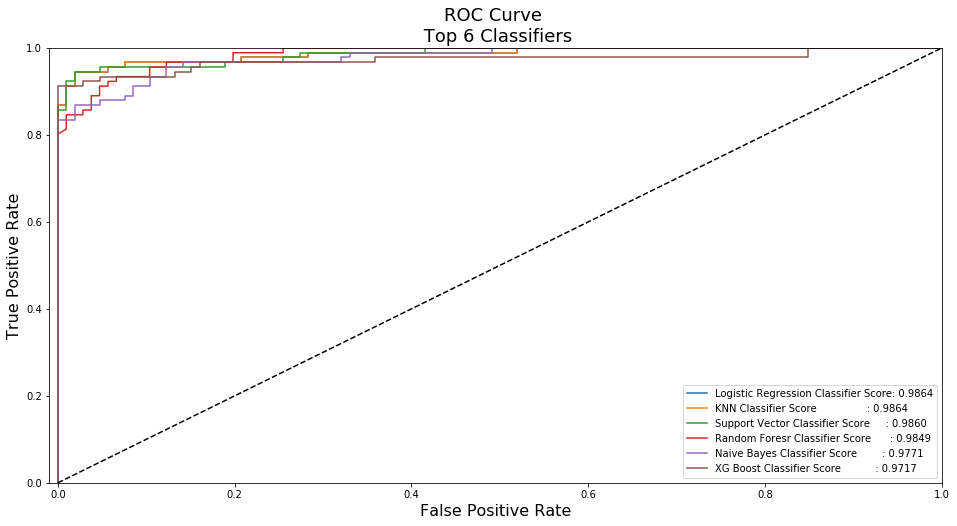

In [112]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_fpr, lr_tpr, lr_thresold = roc_curve(y_test_us, lr.predict_proba(X_test_us)[:,1])
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test_us, lr.predict_proba(X_test_us)[:,1])
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test_us, svc.predict_proba(X_test_us)[:,1])
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test_us, rf.predict_proba(X_test_us)[:,1])
nb_fpr, nb_tpr, nb_threshold = roc_curve(y_test_us, NB.predict_proba(X_test_us)[:,1])
clf_fpr, clf_tpr, clf_threshold = roc_curve(y_test_us, clf.predict_proba(X_test_us)[:,1])

def graph_roc_curve_multiple(lr_fpr, lr_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, 
                             rf_fpr, rf_tpr, nb_fpr, nb_tpr, clf_fpr, clf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 6 Classifiers', fontsize=18)
    plt.plot(lr_fpr, lr_tpr,   label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_us, lr.predict_proba(X_test_us)[:,1])))
    plt.plot(knn_fpr, knn_tpr, label='KNN Classifier Score                : {:.4f}'.format(roc_auc_score(y_test_us, lr.predict_proba(X_test_us)[:,1])))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score     : {:.4f}'.format(roc_auc_score(y_test_us, svc.predict_proba(X_test_us)[:,1])))
    plt.plot(rf_fpr, rf_tpr,   label='Random Foresr Classifier Score      : {:.4f}'.format(roc_auc_score(y_test_us, rf.predict_proba(X_test_us)[:,1])))
    plt.plot(nb_fpr, nb_tpr,   label='Naive Bayes Classifier Score        : {:.4f}'.format(roc_auc_score(y_test_us, NB.predict_proba(X_test_us)[:,1])))
    plt.plot(clf_fpr, clf_tpr, label='XG Boost Classifier Score           : {:.4f}'.format(roc_auc_score(y_test_us, clf.predict_proba(X_test_us)[:,1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(lr_fpr, lr_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, 
                         rf_fpr, rf_tpr, nb_fpr, nb_tpr, clf_fpr, clf_tpr)
plt.show()

#### Logistic Regression Confusion Matrix

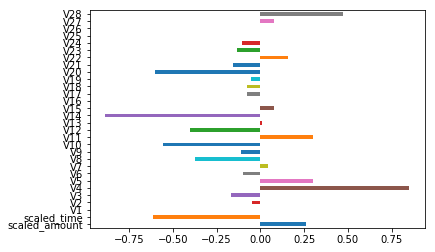

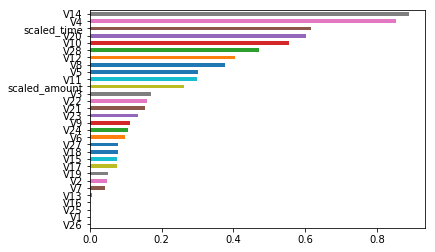

In [114]:
# Confusion Matrix for Logistic Regresion
cm = confusion_matrix(y_test_us, lr.predict(X_test_us))
cm
("Correct Prediction using LR is {0:.2f}%".format(((cm[0][0]+cm[1][1])/cm.sum())*100))


#### Logistic Regression is one of our top predictors hence getting its Feature Importance

In [ ]:
lr.predict_proba(X_test_us)

coefficients = lr.coef_

feature_importance = pd.Series(coefficients[0], index=X.columns)

feature_importance.plot.barh()
plt.show()

ordered_feature_importance = abs(feature_importance).sort_values()
ordered_feature_importance.plot.barh()
plt.show()

In [115]:
print('Length of X_train: {} | Length of y_train: {}'.format(len(X_train), len(y_train)))
print('Length of X_test : {}  | Length of y_test : {}'.format(len(X_test), len(y_test)))

Length of X_train: 227845 | Length of y_train: 227845
Length of X_test : 56962  | Length of y_test : 56962


#### Using Smote to upsample or oversample

In [116]:
# Upsample using SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

sm = SMOTE(random_state=12)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

print('\n Length of X_train: {} | Length of y_train: {}'.format(len(X_train_sm), len(y_train_sm)))


 Length of X_train: 454908 | Length of y_train: 454908


#### Applying Artificial Neural Network for UnderSample

In [117]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train_us.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

undersample_model.summary()

undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])    
    
undersample_model.fit(X_train_us, y_train_us, validation_split=0.2, batch_size=25, epochs=50, shuffle=True, verbose=2)


undersample_predictions = undersample_model.predict(X_test_us, batch_size=200, verbose=0)

undersample_fraud_predictions = undersample_model.predict_classes(X_test_us, batch_size=200, verbose=0)

from sklearn.metrics import confusion_matrix
undersample_smote = confusion_matrix(y_test_us, undersample_fraud_predictions)
undersample_smote

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________
Train on 629 samples, validate on 158 samples
Epoch 1/50
 - 1s - loss: 0.3782 - acc: 0.8124 - val_loss: 0.3026 - val_acc: 0.8861
Epoch 2/50
 - 0s - loss: 0.2522 - acc: 0.9253 - val_loss: 0.2447 - val_acc: 0.9114
Epoch 3/50
 - 0s - loss: 0.1956 - acc: 0.9364 - val_loss: 0.2237 - val_acc: 0.9051
Epoch 4/50
 - 0s - loss: 0.1617 - acc: 0.9396 - val_loss: 0.2108 - val_acc: 0.9051
Epoch 5/50
 - 0s - loss: 0

array([[98,  8],
       [ 4, 87]], dtype=int64)

In [76]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = undersample_model.predict(X_test_us)[:,1]>0.5


# Overfitting Case
print('--' * 42)
print('UnderSmaple: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_test_us, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test_us, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test_us, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test_us, y_pred)))
print('--' * 42)

------------------------------------------------------------------------------------
UnderSmaple: 

Recall Score: 0.95
Precision Score: 0.90
F1 Score: 0.92
Accuracy Score: 0.92
------------------------------------------------------------------------------------


#### Applying Artificial Neural Network for OverSample

In [60]:
n_inputs = X_train_sm.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
    
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
oversample_model.fit(X_train_sm, y_train_sm, validation_split=0.2, batch_size=300, epochs=50, shuffle=True, verbose=2)

oversample_predictions = oversample_model.predict(X_test, batch_size=200, verbose=0)

oversample_fraud_predictions = oversample_model.predict_classes(X_test, batch_size=200, verbose=0)

from sklearn.metrics import confusion_matrix
oversample_smote = confusion_matrix(y_test, oversample_fraud_predictions)
oversample_smote

Train on 363926 samples, validate on 90982 samples
Epoch 1/50
 - 6s - loss: 0.0766 - acc: 0.9707 - val_loss: 0.0260 - val_acc: 0.9951
Epoch 2/50
 - 5s - loss: 0.0170 - acc: 0.9958 - val_loss: 0.0147 - val_acc: 0.9993
Epoch 3/50
 - 5s - loss: 0.0092 - acc: 0.9980 - val_loss: 0.0069 - val_acc: 0.9998
Epoch 4/50
 - 4s - loss: 0.0059 - acc: 0.9988 - val_loss: 0.0048 - val_acc: 0.9999
Epoch 5/50
 - 4s - loss: 0.0045 - acc: 0.9990 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 6/50
 - 4s - loss: 0.0034 - acc: 0.9993 - val_loss: 0.0020 - val_acc: 0.9999
Epoch 7/50
 - 4s - loss: 0.0030 - acc: 0.9994 - val_loss: 0.0062 - val_acc: 0.9986
Epoch 8/50
 - 4s - loss: 0.0025 - acc: 0.9994 - val_loss: 7.0478e-04 - val_acc: 1.0000
Epoch 9/50
 - 5s - loss: 0.0022 - acc: 0.9995 - val_loss: 7.2135e-04 - val_acc: 1.0000
Epoch 10/50
 - 4s - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0029 - val_acc: 0.9996
Epoch 11/50
 - 4s - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0018 - val_acc: 0.9998
Epoch 12/50
 - 4s - loss: 

array([[56808,    53],
       [   17,    84]], dtype=int64)

In [118]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = oversample_model.predict(X_test_us)[:,1]>0.5


# Overfitting Case
print('--' * 42)
print('OverSmaple: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_test_us, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test_us, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test_us, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test_us, y_pred)))
print('--' * 42)

------------------------------------------------------------------------------------
OverSmaple: 

Recall Score: 0.97
Precision Score: 1.00
F1 Score: 0.98
Accuracy Score: 0.98
------------------------------------------------------------------------------------
